# 데이터 크롤링
> - 파이썬을 이용하여 웹상의 데이터를 모아보자.

우리는 매일 크롤러를 사용하고 있다.
> - 검색엔진(구글, 네이버)

### 웹 크롤링하는 의식의 흐름
> - 정보를 가져오고자 하는 url 정의
> - url정보로 requests로 정보 요청
> - text 정보를 html로 변환
> - html에서 우리가 필요한 정보만 선별

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서  



```
<span class="news" id="1234">비비고 왕교자</span>
<span class="product" id="1235">비비고 볶음밥</span>
```



>> 단일 셀렉터 
``` 
html.select('span')  # 태그 이름이 span인 친구들을 다 들고옴  
```
tag : span  
class(별명, 그룹명) : .news

>> 클래스 포함 셀렉터
```
html.select('span.news') # 태그 이름이 span이고 class가 news인 것들을 불러옴.
```

>> id 포함 셀렉터
id(고유값) : #1234
```
html.select('span#1234') # 태그가 span이고 id가 1234인것들을 불러옴.
```

#### 복합 셀렉터
    1. 조합 셀렉터
    <span>1</span>
    <span class="txt">2</span>
    <em class="txt">3</em>
    
    태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt 
    li 태그 중에서 id가 name 인 라인을 찾고\ 싶다. : li#name

    2. 경로 셀렉터
    
    <ul>
        <li><span>이걸 찾으려면?</span></li>
    </ul>
    <span>이건 아님</span>

    ul 태그안 li 태그 안 span 라인을 찾는다
    ul > li > span 혹은 ul li span

    html.select('ul li span')
    html.select('ul > li > span')

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

## 네이버 메인페이지 크롤링

In [3]:
url = 'https://www.naver.com/'
resp = requests.get(url)

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
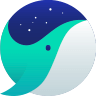
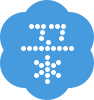

In [4]:
resp.text # BeautifulSoup을 이용해 좀 더 보기 편하게 바꾸자.

In [6]:
html = BeautifulSoup(resp.text, 'html.parser')

> - 해당페이지의 이미지만 보고 싶다.

[<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_mousegesture_v2@2x.png" style="padding-left: 90px" width="200"/>,
 <img alt="국민일보" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/005.png"/>,
 <img alt="디지털타임스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/029.png"/>,
 <img alt="뉴데일리" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/327.png"/>,
 <img alt="MBC" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/214.png"/>,
 <img alt="데일리안" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/368.png"/>,
 <img alt="노컷뉴스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/079.png"/>,
 <img alt="뉴시스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/003.pn
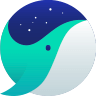
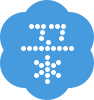

In [7]:
img = html.select('img')
img # img tag로 된 모든 항목을 관측가능하다.

## 다음 뉴스페이지 크롤링

In [8]:
url = 'https://news.daum.net/'
resp = requests.get(url)
resp #<Response [200]>이면 제대로 된 것이다.

<Response [200]>

> - 100 우리 이런정보 내주는거야
> - 200 성공
> - 300 우리 이 사이트 이리루 이사했어 일루가
> - 400 유저가 요청을 잘못한경우
> - 500 서버 문제

In [14]:
html = BeautifulSoup(resp.text, 'html.parser')
html.select('a.link_txt') # 리스트 형태로 반환되기 때문에 반복문, index를 통해 접근.

[<a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20220425184611715" data-tiara-id="20220425184611715" data-tiara-layer="article_main" data-tiara-ordnum="1" data-tiara-type="harmony" href="https://v.daum.net/v/20220425184611715">
                                     한덕수, 참여정부 총리 땐 "여가부 독립 존치해야"라더니..
                                 </a>,
 <a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20220425184601707" data-tiara-id="20220425184601707" data-tiara-layer="article_main" data-tiara-ordnum="2" data-tiara-type="harmony" href="https://v.daum.net/v/20220425184601707">
                                     중재안 사전에 몰랐다는 김오수.. 검사들 "바보 아니면 거짓말쟁이"
                                 </a>,
 <a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20220425184327670" data-tiara-id="20220425184327670" data-tiara-layer="article_main" data-tiara-ordnum="3" data-tiara-type="harmony" href="https://v.daum.net/v/20220425184327670">
                                     전문가 "北, 尹 

In [17]:
for title in html.select('a.link_txt')[:-13]:
    print(title.text.strip().replace('[', '').replace(']', ''))

한덕수, 참여정부 총리 땐 "여가부 독립 존치해야"라더니..
중재안 사전에 몰랐다는 김오수.. 검사들 "바보 아니면 거짓말쟁이"
전문가 "北, 尹 취임식 계기 전술 핵폭탄 실험 도발 가능"
서부지검 "검수완박 중재안 반대".. '조국 참모' 이종근 지검장은 빠졌다
"기업하기 좋은 도시" 내건 홍준표, 대구 산단 현장방문
쌍용차, 개선계획 이행여부 심의 요청..개선 기간 연장되나
백제의 화려한 유적, 독특한 양식의 성당과 근대 건축물들최갑수의 여행이라는 꽃다발 <13> 전북 익산
선서도 못한 한덕수..청문회 파행에 '우두커니' 있다가 퇴장
대면진료병원 '태부족'..일반의료체계 전환 가능할까?
아프리카 말라위서 '한반도평화' K-팝 대회
'크롤링'다윈중개에 뿔난 네이버 "본안 소송 제기" 강력 대응 시사
새 집무실 이름은 국민의집?..尹 당선인, '피플스 하우스' 언급
사업과 우정 사이..망가진 "CNN의 미래" 파워게임 속사정
변협회장 결선투표제 폐지..회관 서초동으로 이전
소액으로 고액자산 쉽게 사지만.. '먹튀'땐 보호 못받는다조각투자, 혁신인가 허상인가
선거브로커 돈 받은 국회의원, 단체장은 누구?
주 52시간 근무제 도입했더니..장시간 노동자 60% 감소
'죽고 싶다' '우울해' 검색 폭증.. 코로나는 끝나지 않았다
충북대병원 전공의협 "오송 카이스트 의전원 건립 반대"
우크라 이어 몰도바도?..러, 공격 타깃 시사에 전운 ↑
최갑수의 여행이라는 꽃다발 <13> 전북 익산 백제의 화려한 유적, 독특한 양식의 성당과 근대 건축물들
시승기 쉐보레 '타호' | 거대한 차체에도 민첩한 주행..내부 공간 '광활'
ET "맛보고 가세요" 돌아온 시식 코너 외
여의도 사사건건 허은아 "합의 파기 아닌 재논의 요청" 전재수 "국회 합의안 엎어버리는 '당선자의 독주'"
비디오머그 해외 주식 소수점 투자, 아낀 것 같은데요. 사실은 비쌉니다.
마음주치의 우울한 노년의 부모님. 어떻게 병원에 모시고 갈 수 있나 (오강섭 교수)
월드피플+ 꼬마 아인슈타인?..美 13세 대학생

## 로또 번호 가져오기

In [18]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%A1%9C%EB%98%90%EB%B2%88%ED%98%B8'

resp = requests.get(url)
resp

<Response [200]>

In [21]:
html = BeautifulSoup(resp.text, 'html.parser')


In [23]:
lotto_nums = []
for item in html.select('span.ball'):
    lotto_nums.append(int(item.text))

lotto_nums

[5, 11, 18, 20, 35, 45, 3]

### 여러회차 로또번호 가져오기
> - 페이지를 넘어가며 정보 수집.
> - 만들어진 정보를 df로 지정 및 csv파일로 저장.

>여러페이지를 한번에 크롤링 하는경우 서버에 요청을 다수하게되 차단이 일어날 수 있으므로 미리 난수를 만들어 코드 실행시간을 일정치 않게하여 사전에 차단을 예방한다. 


```
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)
time.sleep(a)
```



In [29]:
import time

In [32]:
lst = [i for i in range(1000, 1011)] # 1000 ~ 1010회차에 해당하는 로또 당첨번호를 크롤링해보자.
lotto_nums = []


for times in lst:

    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)

    print(f'{times}회차 크롤링 중...')
    url = f'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query={times}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8'
    resp = requests.get(url)
    html = BeautifulSoup(resp.text, 'html.parser')
    for elem in html.select('span.ball'):
        lotto_nums.append(int(elem.text))

# url = 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query=1012%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8'

1000회차 크롤링 중...
1001회차 크롤링 중...
1002회차 크롤링 중...
1003회차 크롤링 중...
1004회차 크롤링 중...
1005회차 크롤링 중...
1006회차 크롤링 중...
1007회차 크롤링 중...
1008회차 크롤링 중...
1009회차 크롤링 중...
1010회차 크롤링 중...


In [35]:
lotto_arr = np.array(lotto_nums).reshape(-1, 7) # numpy array를 이용해 shape을 각 회차에 맞게 바꾸어준다.

In [43]:
df = pd.DataFrame(data=lotto_arr, index=[f'{elem}회차' for elem in lst], columns=[i for i in range(1,7)] + ['보너스'])
df

,1,2,3,4,5,6,보너스
1000회차,2,8,19,22,32,42,39
1001회차,6,10,12,14,20,42,15
1002회차,17,25,33,35,38,45,15
1003회차,1,4,29,39,43,45,31
1004회차,7,15,30,37,39,44,18
1005회차,8,13,18,24,27,29,17
1006회차,8,11,15,16,17,37,36
1007회차,8,11,16,19,21,25,40
1008회차,9,11,30,31,41,44,33
1009회차,15,23,29,34,40,44,20


In [45]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/일자별 학습내용 정리/0425_python_crawler/data/lotto_nums.csv.gz')
## 만들어진 dataFrame을 csv형식(압축)으로 저장.

In [46]:
# 제대로 저장 되었는지 불러와서 확인해보자.

loaded_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/일자별 학습내용 정리/0425_python_crawler/data/lotto_nums.csv.gz')
loaded_df

## 제대로 불러와지는것을 확인할 수 있다.

,Unnamed: 0,1,2,3,4,5,6,보너스
0,1000회차,2,8,19,22,32,42,39
1,1001회차,6,10,12,14,20,42,15
2,1002회차,17,25,33,35,38,45,15
3,1003회차,1,4,29,39,43,45,31
4,1004회차,7,15,30,37,39,44,18
5,1005회차,8,13,18,24,27,29,17
6,1006회차,8,11,15,16,17,37,36
7,1007회차,8,11,16,19,21,25,40
8,1008회차,9,11,30,31,41,44,33
9,1009회차,15,23,29,34,40,44,20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


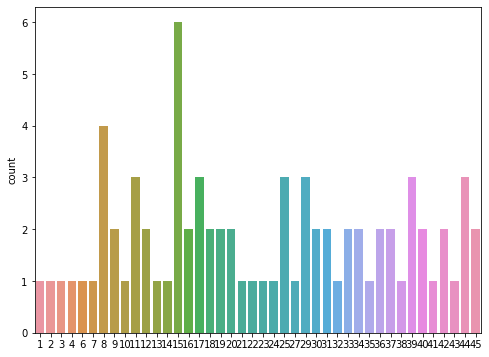

In [56]:
## 10회차에 걸쳐 어떤 번호가 많이 관측되었는지 그래프로 나타내보자.



plt.figure(figsize=(8, 6))

sns.countplot(lotto_nums)

plt.show()

## 네이버 키워드로 검색한 결과를 크롤링

In [67]:
search = input('검색어: ') # 검색어를 입력하고 그에 맞는 페이지에서 블로그 제목, 하이퍼링크를 크롤링. 


url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={search}'

resp = requests.get(url)
html = BeautifulSoup(resp.text, 'html.parser')


검색어: 홍대맛집


In [68]:
for elem in html.select('a.api_txt_lines.total_tit'):
    print(elem.text, ':', elem.attrs['href'])

뿌듯했던 홍대 맛집 : https://blog.naver.com/papakang3156/222692642625
아는 사람만 아는,숨겨진 홍대 맛집 : https://post.naver.com/viewer/postView.naver?volumeNo=33341928&memberNo=8627427&vType=VERTICAL
뇌리에 박힌 홍대 맛집 추천 : https://blog.naver.com/skadlftnwls/222655994813
맘가는 홍대 맛집 : https://blog.naver.com/hjtm1020/222681432872
호불호 안 갈리는 홍대 맛집 추천 : https://blog.naver.com/cherie_leau/222670478632
다음에도 또 방문할 홍대입구역 맛집 : https://blog.naver.com/sbhmudsalt/222657798502
끝판왕!! 홍대 맛집 : https://blog.naver.com/larva63/222655952793
입맛살린 홍대 맛집 : https://blog.naver.com/o_market/222707384577
홍대 맛집 추천 뭘 먹어야 할 지 모르겠다면! : https://blog.naver.com/weareinjapan/222707147585


## 관심있는 개별종목의 시가총액, 외국인 소진률, PER, PBR 가져오기

In [69]:
url = 'https://finance.naver.com/item/main.nhn?code=005930'
resp = requests.get(url)
html = BeautifulSoup(resp.text, 'html.parser')


In [85]:
시가총액 = html.select('tr.strong em')[0].text.replace('\t', '').replace('\n', '')
외국인소진률 = html.select('tr.strong em')[1].text
PER = html.select('em#_per')[0].text
PBR = html.select('em#_pbr')[0].text

'1.52'

## 여러종목의 시가총액, 외국인 소진률, PER, PBR 가져오기.

In [90]:
stock_dict = {
    '삼성전자': '035720',
    '카카오': '005930',
    '현대차': '005380'
}

# 각 종목별 코드가 정해져있음.

stock_lst = []
index = []

for elem in stock_dict.values():

    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    
    url = f'https://finance.naver.com/item/main.nhn?code={elem}'
    
    resp = requests.get(url)
    html = BeautifulSoup(resp.text, 'html.parser')

    index.append(html.select('h2 a')[0].text)
    stock_lst.append(html.select("em#_market_sum")[0].text.strip().replace('\t', '').replace('\n', ''))
    stock_lst.append(html.select('tr.strong td em')[1].text)
    stock_lst.append(html.select('em#_per')[0].text)
    stock_lst.append(html.select('em#_pbr')[0].text)

In [95]:
columns = ['시가총액', '외국인 소진률', 'PER', 'PBR']

In [96]:
stock_arr = np.array(stock_lst).reshape(-1, 4) 

In [97]:
# dataFrame으로 만들기

df = pd.DataFrame(stock_arr, index=index, columns=columns)
df

,시가총액,외국인 소진률,PER,PBR
카카오,40조305,28.75%,28.64,3.90
삼성전자,"395조7,966",51.13%,11.48,1.52
현대차,"38조8,876",26.61%,10.20,0.63


In [99]:
# PER, PBR에 대하여 dtype을 변경해주자. (float64)

df['PER'] = df['PER'].astype('float64')
df['PBR'] = df['PBR'].astype('float64')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 카카오 to 현대차
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시가총액     3 non-null      object 
 1   외국인 소진률  3 non-null      object 
 2   PER      3 non-null      float64
 3   PBR      3 non-null      float64
dtypes: float64(2), object(2)
memory usage: 228.0+ bytes


In [101]:
# 마찬가지로 csv 파일로 저장 후 불러와보자.

df.to_csv('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/일자별 학습내용 정리/0425_python_crawler/data/stock.csv.gz')


In [104]:
loaded_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/일자별 학습내용 정리/0425_python_crawler/data/stock.csv.gz')
loaded_df

#저장된 파일이 제대로 불러와짐을 볼수있다.

,Unnamed: 0,시가총액,외국인 소진률,PER,PBR
0,카카오,40조305,28.75%,28.64,3.90
1,삼성전자,"395조7,966",51.13%,11.48,1.52
2,현대차,"38조8,876",26.61%,10.20,0.63


## 동적페이지 크롤링 (네이버 주식 시세)

In [105]:
# 동적페이지의 숨은 url
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달해줘야함.
# requests 요청시 헤더정보 추가

url = 'https://finance.naver.com/item/sise_day.naver?code=005380&page=2'

info = {
    'referer': 'https://finance.naver.com/item/sise_day.naver?code=005380&page=1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'
}

# 레퍼러정보 : 사용자가 이 페이지에 접속하기 전 어느 페이지에 있었는지
# 유저에이전트: 사용자컴퓨터 정보

In [108]:
resp = requests.get(url, headers=info) # 헤더에 위에서 정의한 info정보를 넣어줌.

In [109]:
html = BeautifulSoup(resp.text, 'html.parser')

In [123]:


index = [date.text for date in html.select('span.tah.p10')]
col_nm = [col.text for col in html.select('th')[1:]]
price = [num.text.strip() for num in html.select('span.tah.p11')]

In [124]:
price = np.array(price).reshape(-1, 6)
price

array([['179,500', '3,000', '176,000', '181,000', '175,500', '641,674'],
       ['176,500', '2,000', '178,000', '179,000', '175,500', '458,780'],
       ['178,500', '1,500', '180,000', '182,000', '178,500', '778,374'],
       ['180,000', '1,000', '177,000', '182,000', '176,500', '641,803'],
       ['179,000', '1,000', '178,500', '180,000', '177,000', '426,072'],
       ['178,000', '0', '177,000', '179,000', '174,500', '509,106'],
       ['178,000', '2,500', '178,000', '178,500', '177,000', '470,770'],
       ['180,500', '500', '180,500', '181,000', '179,000', '576,522'],
       ['181,000', '4,500', '180,000', '183,000', '179,500', '1,082,135'],
       ['176,500', '2,000', '176,000', '178,000', '174,000', '545,335']],
      dtype='<U9')

In [125]:
df = pd.DataFrame(price, index=index, columns=col_nm)
df

# 동적페이지의 경우에도 위와 같은 방식으로 접근해 데이터를 크롤링할 수 잇다.

,종가,전일비,시가,고가,저가,거래량
2022.04.11,"179,500","3,000","176,000","181,000","175,500","641,674"
2022.04.08,"176,500","2,000","178,000","179,000","175,500","458,780"
2022.04.07,"178,500","1,500","180,000","182,000","178,500","778,374"
2022.04.06,"180,000","1,000","177,000","182,000","176,500","641,803"
2022.04.05,"179,000","1,000","178,500","180,000","177,000","426,072"
2022.04.04,"178,000",0,"177,000","179,000","174,500","509,106"
2022.04.01,"178,000","2,500","178,000","178,500","177,000","470,770"
2022.03.31,"180,500",500,"180,500","181,000","179,000","576,522"
2022.03.30,"181,000","4,500","180,000","183,000","179,500","1,082,135"
2022.03.29,"176,500","2,000","176,000","178,000","174,000","545,335"


In [131]:
# 종가에 대해 그래프로 그려 표현해보자
# dtype이 object이므로 int type으로 변환 후 진행해야한다.

def make_int(x):
    return x.replace(',', '')

df['종가'] = df['종가'].map(make_int)


In [135]:
df['종가'] = df['종가'].astype('int64')

In [136]:
df['종가']

2022.04.11    179500
2022.04.08    176500
2022.04.07    178500
2022.04.06    180000
2022.04.05    179000
2022.04.04    178000
2022.04.01    178000
2022.03.31    180500
2022.03.30    181000
2022.03.29    176500
Name: 종가, dtype: int64

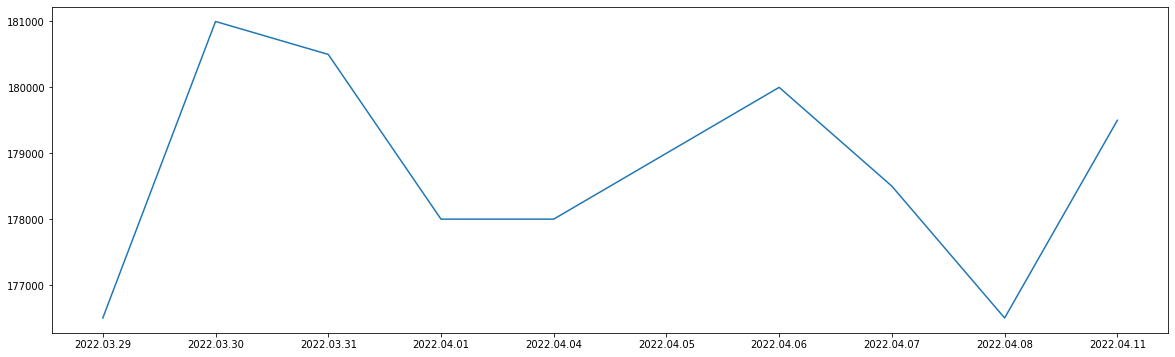

In [140]:
plt.figure(figsize=(20, 6))

plt.plot(df['종가'].sort_index(ascending=True))

plt.show()

## 네이버 데이터랩 인기검색어 크롤링
> - json 데이터 파싱

In [141]:
url = 'https://datalab.naver.com/shoppingInsight/getKeywordRank.naver?timeUnit=date&cid=50000000'

info = {
    'referer': 'https://datalab.naver.com/',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'
}

resp = requests.post(url, headers=info)

In [142]:
resp.text

'[{"message":null,"statusCode":200,"returnCode":0,"date":"2022/04/13","datetime":"2022.04.13.(수)","range":"","ranks":[{"rank":1,"keyword":"원피스","linkId":"원피스"},{"rank":2,"keyword":"반팔티","linkId":"반팔티"},{"rank":3,"keyword":"바람막이","linkId":"바람막이"},{"rank":4,"keyword":"나이키바람막이","linkId":"나이키바람막이"},{"rank":5,"keyword":"블라우스","linkId":"블라우스"},{"rank":6,"keyword":"반바지","linkId":"반바지"},{"rank":7,"keyword":"셔츠","linkId":"셔츠"},{"rank":8,"keyword":"롱원피스","linkId":"롱원피스"},{"rank":9,"keyword":"하객원피스","linkId":"하객원피스"},{"rank":10,"keyword":"써스데이아일랜드원피스","linkId":"써스데이아일랜드원피스"}]},{"message":null,"statusCode":200,"returnCode":0,"date":"2022/04/14","datetime":"2022.04.14.(목)","range":"","ranks":[{"rank":1,"keyword":"원피스","linkId":"원피스"},{"rank":2,"keyword":"반팔티","linkId":"반팔티"},{"rank":3,"keyword":"반티","linkId":"반티"},{"rank":4,"keyword":"바람막이","linkId":"바람막이"},{"rank":5,"keyword":"나이키바람막이","linkId":"나이키바람막이"},{"rank":6,"keyword":"반바지","linkId":"반바지"},{"rank":7,"keyword":"셔츠","linkId":"셔츠"},{"rank":8,"

In [143]:
import json

In [144]:
data = json.loads(resp.text)
data

[{'date': '2022/04/13',
  'datetime': '2022.04.13.(수)',
  'message': None,
  'range': '',
  'ranks': [{'keyword': '원피스', 'linkId': '원피스', 'rank': 1},
   {'keyword': '반팔티', 'linkId': '반팔티', 'rank': 2},
   {'keyword': '바람막이', 'linkId': '바람막이', 'rank': 3},
   {'keyword': '나이키바람막이', 'linkId': '나이키바람막이', 'rank': 4},
   {'keyword': '블라우스', 'linkId': '블라우스', 'rank': 5},
   {'keyword': '반바지', 'linkId': '반바지', 'rank': 6},
   {'keyword': '셔츠', 'linkId': '셔츠', 'rank': 7},
   {'keyword': '롱원피스', 'linkId': '롱원피스', 'rank': 8},
   {'keyword': '하객원피스', 'linkId': '하객원피스', 'rank': 9},
   {'keyword': '써스데이아일랜드원피스', 'linkId': '써스데이아일랜드원피스', 'rank': 10}],
  'returnCode': 0,
  'statusCode': 200},
 {'date': '2022/04/14',
  'datetime': '2022.04.14.(목)',
  'message': None,
  'range': '',
  'ranks': [{'keyword': '원피스', 'linkId': '원피스', 'rank': 1},
   {'keyword': '반팔티', 'linkId': '반팔티', 'rank': 2},
   {'keyword': '반티', 'linkId': '반티', 'rank': 3},
   {'keyword': '바람막이', 'linkId': '바람막이', 'rank': 4},
   {'keyword'

In [145]:
for item in data:
    print(item['datetime'], item['ranks'][0]['keyword'])

2022.04.13.(수) 원피스
2022.04.14.(목) 원피스
2022.04.15.(금) 원피스
2022.04.16.(토) 원피스
2022.04.17.(일) 원피스
2022.04.18.(월) 원피스
2022.04.19.(화) 원피스
2022.04.20.(수) 원피스
2022.04.21.(목) 원피스
2022.04.22.(금) 원피스
2022.04.23.(토) 원피스
2022.04.24.(일) 원피스


## API 활용

> - 파파고를 써보자

In [148]:
url = 'https://openapi.naver.com/v1/papago/n2mt'

info = {
    "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
    "X-Naver-Client-Id": "mEh9FgYD4uG4gmttEeG1",
    "X-Naver-Client-Secret": "g_8XOEMe23"
}

typing = input('한글: ')

data = {
    'source': 'ko',
    'target': 'en',
    'text': f'{typing}?'
}

resp = requests.post(url, headers=info, data=data)
trans = json.loads(resp.text)
trans['message']['result']['translatedText']

한글: 안녕 넌 누구니?


'Hi, who are you?'

'Hello, world?'